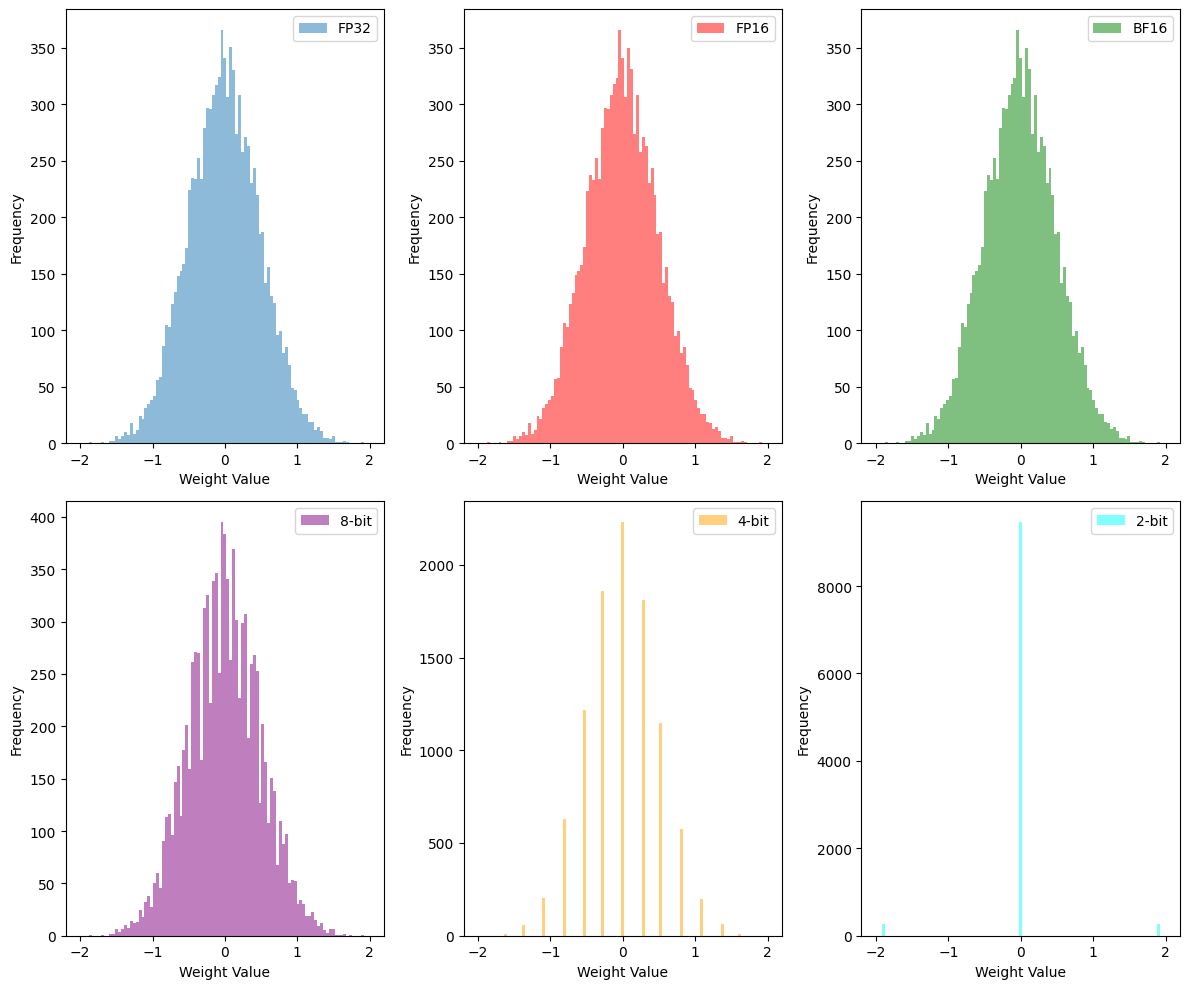

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def quantize_weights(weights, bits):
    """
    Quantize the weights to a specified number of bits.
    For floating point, just simulate lower precision.
    For integers, simulate actual quantization.
    """
    if bits == 32:  # FP32
        return weights.astype(np.float32)
    elif bits == 16:  # FP16
        return weights.astype(np.float16)
    elif bits == 'bf16':
        # Simulating bfloat16 by using float32 but with half the precision in the mantissa
        return np.float32(np.float16(weights))
    else:
        # Integer quantization
        scale = np.max(np.abs(weights))
        max_int = 2**(bits-1) - 1
        quantized = np.round((weights / scale) * max_int)
        return quantized * (scale / max_int)

# Generate synthetic weights (normally distributed)
np.random.seed(0)
weights = np.random.normal(loc=0, scale=0.5, size=10000)

# Quantization
weights_fp32 = quantize_weights(weights, 32)
weights_fp16 = quantize_weights(weights, 16)
weights_bf16 = quantize_weights(weights, 'bf16')
weights_8bit = quantize_weights(weights, 8)
weights_4bit = quantize_weights(weights, 4)
weights_2bit = quantize_weights(weights, 2)

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

bins = np.linspace(-2, 2, 100)
axs[0].hist(weights_fp32, bins, alpha=0.5, label='FP32')
axs[1].hist(weights_fp16, bins, alpha=0.5, label='FP16', color='red')
axs[2].hist(weights_bf16, bins, alpha=0.5, label='BF16', color='green')
axs[3].hist(weights_8bit, bins, alpha=0.5, label='8-bit', color='purple')
axs[4].hist(weights_4bit, bins, alpha=0.5, label='4-bit', color='orange')
axs[5].hist(weights_2bit, bins, alpha=0.5, label='2-bit', color='cyan')

for ax in axs:
    ax.set_xlabel('Weight Value')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()
